# Project EDA (Golden Globe Awards) - Kelompok 7

### 1. Import Package yang akan digunakan

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Import Data

#### https://www.kaggle.com/unanimad/golden-globe-awards

In [2]:
data = pd.read_csv('Kelompok 7 Golden Globe Awards.csv')

In [3]:
data.head(5)

,year_film,year_award,ceremony,category,nominee,film,win
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True


- year_film : tahun film release
- year_award : tahun penghargaan
- ceremony : perayaan keberapa
- category : kategori yang dinominasikan
- nominee : nama aktor/aktris/dsb yang masuk nominasi
- film : nama film dari tiap nominasi
- win : apakah nominasi menang atau tidak

### 3. Deskripsi Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 7 columns):
year_film     7991 non-null int64
year_award    7991 non-null int64
ceremony      7991 non-null int64
category      7991 non-null object
nominee       7991 non-null object
film          6191 non-null object
win           7991 non-null bool
dtypes: bool(1), int64(3), object(3)
memory usage: 382.5+ KB


In [5]:
data.describe()

,year_film,year_award,ceremony
count,7991.000000,7991.000000,7991.000000
mean,1987.490552,1988.490552,45.490552
std,18.936258,18.936258,18.936258
min,1943.000000,1944.000000,1.000000
25%,1972.000000,1973.000000,30.000000
50%,1988.000000,1989.000000,46.000000
75%,2004.000000,2005.000000,62.000000
max,2019.000000,2020.000000,77.000000


In [6]:
data.isnull().sum()

year_film        0
year_award       0
ceremony         0
category         0
nominee          0
film          1800
win              0
dtype: int64

### 3a. Dataset yang terdapat Null Values

In [7]:
data_with_NaN = data[data.isnull().any(axis=1)]

In [8]:
pd.DataFrame(data_with_NaN).head(10)

,year_film,year_award,ceremony,category,nominee,film,win
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
9,1944,1945,2,Picture,Going My Way,NaN,True
16,1945,1946,3,Picture,The Lost Weekend,NaN,True
24,1946,1947,4,Picture,The Best Years Of Our Lives,NaN,True
35,1947,1948,5,Picture,Gentleman's Agreement,NaN,True
46,1948,1949,6,Picture,Johnny Belinda,NaN,True
47,1948,1949,6,Picture,The Treasure of the Sierra Madre,NaN,True
71,1949,1950,7,Outstanding Use Of Color,The Adventures of Ichabod and Mr. Toad,NaN,True
72,1949,1950,7,Outstanding Use Of Color,On The Town,NaN,False
73,1949,1950,7,Picture,All The King's Men,NaN,True


In [9]:
pd.DataFrame(data_with_NaN['category'].unique(), columns = ['category'])

,category
0,Picture
1,Outstanding Use Of Color
2,Henrietta Award (World Film Favorites)
3,Best Motion Picture - Drama
4,Best Motion Picture - Musical or Comedy
5,Henrietta Award (World Film Favorite)
6,Cecil B. deMille Award
7,Documentary
8,Hollywood Citizenship Award
9,Television Achievement


### 3b. Data Bersih

In [10]:
data_clean = data.replace(np.nan, 'non film', regex=True)

In [11]:
data_clean.isnull().sum()

year_film     0
year_award    0
ceremony      0
category      0
nominee       0
film          0
win           0
dtype: int64

### 3c. Dataset yang hanya berisi pemenang saja

In [12]:
data_win = data_clean.loc[data_clean.win==True]
data_win.sample(10)

,year_film,year_award,ceremony,category,nominee,film,win
7611,2017,2018,75,Best Motion Picture - Drama,"Three Billboards Outside Ebbing, Missouri",non film,True
3350,1983,1984,41,Best Performance by an Actress in a Supporting...,Cher,Silkwood,True
1103,1964,1965,22,Foreign Film - English Language,"United Kingdom, Desmond Davis",Girl With Green Eyes,True
2371,1975,1976,33,Best Performance by an Actor In A Television S...,Telly Savalas,Kojak,True
884,1962,1963,20,New Star Of The Year - Actor,Keir Dullea,David and Lisa,True
7731,2017,2018,75,Best Performance by an Actor in a Supporting R...,Alexander Skarsgård,Big Little Lies,True
7514,2016,2017,74,Best Performance by an Actress in a Supporting...,Viola Davis,Fences,True
4843,1995,1996,53,Best Performance by an Actress in a Motion Pic...,Sharon Stone,Casino,True
287,1955,1956,13,Best Performance by an Actor in a Supporting R...,Arthur Kennedy,Trial,True
7589,2016,2017,74,Best Performance by an Actress in a Television...,Tracee Ellis Ross,Black-ish,True


### 4. Tren Nominasi

Text(0, 0.5, 'Nominations')

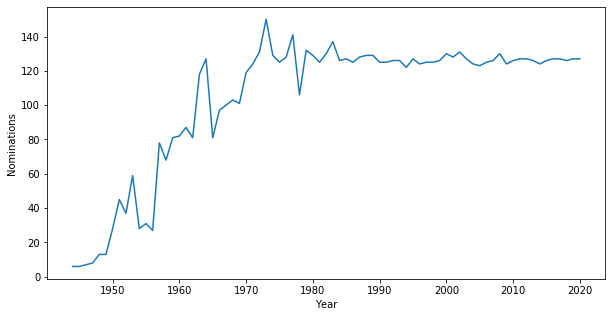

In [13]:
plt.figure(figsize=(10,5))
df = data_clean['year_award'].value_counts()
sns.lineplot(x=df.index, y=df.values)
plt.xticks()
plt.yticks()
plt.xlabel("Year")
plt.ylabel("Nominations")

### 5. Visualisasi Nominasi Kategori Teratas

#### 5a. Menggunakan Data Keseluruhan

In [14]:
Top_Category = data_clean.category.value_counts().reset_index()
Top_Category.columns = ['category', 'nomination']
Top_Category.head(10)

,category,nomination
0,Best Performance by an Actress in a Supporting...,360
1,Best Director - Motion Picture,357
2,Best Performance by an Actor in a Supporting R...,352
3,Best Motion Picture - Drama,351
4,Best Performance by an Actor in a Motion Pictu...,344
5,Best Performance by an Actor in a Motion Pictu...,342
6,Best Performance by an Actress in a Motion Pic...,342
7,Best Original Score - Motion Picture,320
8,Best Motion Picture - Musical or Comedy,306
9,Best Screenplay - Motion Picture,293


Text(0, 0.5, 'Category')

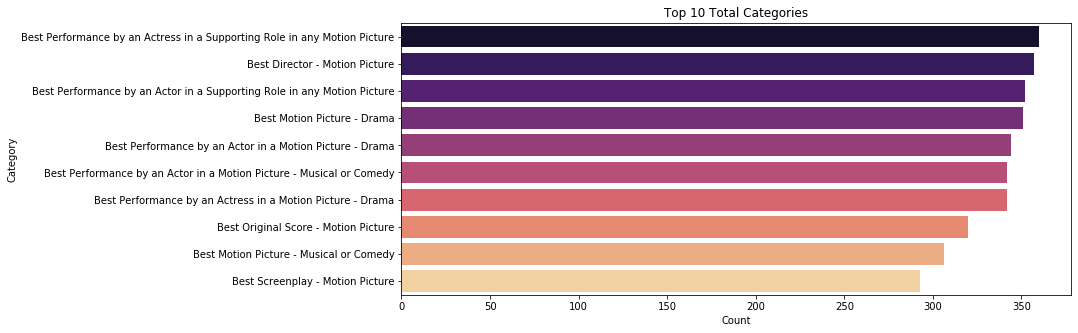

In [15]:
Top_10_Categories=Top_Category.head(10)
plt.figure(figsize=(12,5))
plt.title('Top 10 Total Categories')
sns.barplot(y='category',x='nomination', data=Top_10_Categories, palette = 'magma')
plt.xlabel('Count')
plt.ylabel('Category')

#### 5b. Menggunakan Data Non Film

In [16]:
data_non_film = data_clean.loc[data_clean['film'] == 'non film'].reset_index(drop=True)

Text(0, 0.5, 'Category')

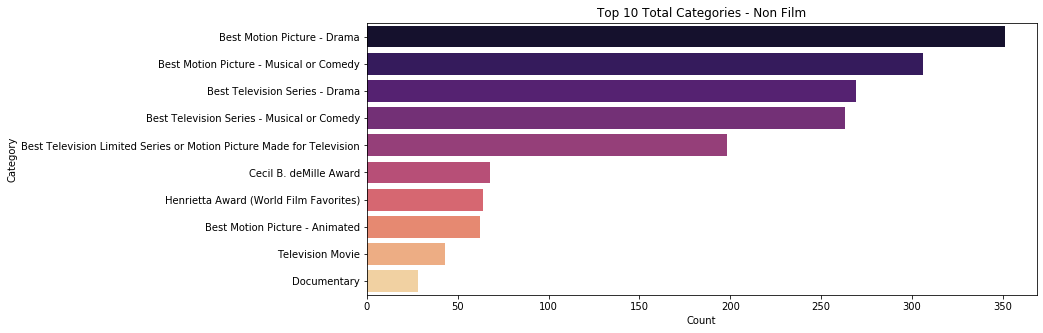

In [17]:
Top_Category_Non_Film = data_non_film.category.value_counts().head(10).reset_index()
Top_Category_Non_Film.columns = ['category', 'nomination']

plt.figure(figsize=(12,5))
plt.title('Top 10 Total Categories - Non Film')
sns.barplot(y='category',x='nomination', data=Top_Category_Non_Film, palette = 'magma')
plt.xlabel('Count')
plt.ylabel('Category')

#### 5c. Menggunakan Data Film

In [18]:
data_film = data_clean.loc[data_clean['film'] != 'non film'].reset_index(drop=True)

Text(0, 0.5, 'Category')

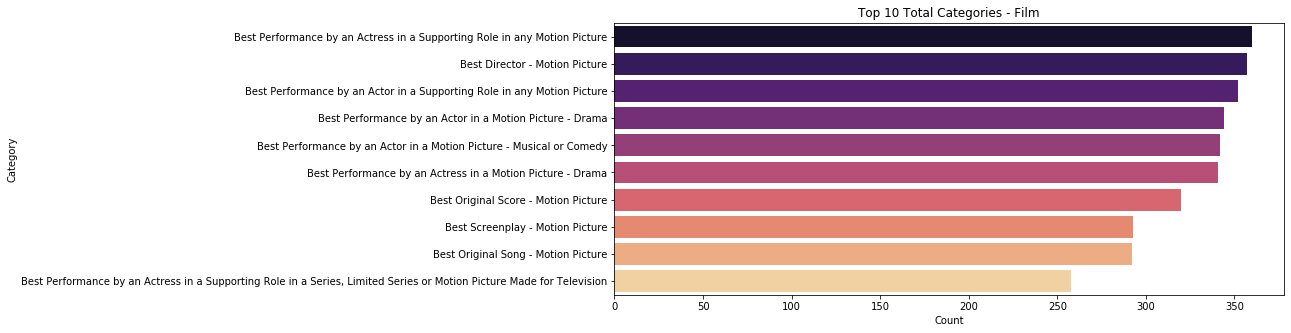

In [19]:
Top_Category_Film = data_film.category.value_counts().head(10).reset_index()
Top_Category_Film.columns = ['category', 'nomination']

plt.figure(figsize=(12,5))
plt.title('Top 10 Total Categories - Film')
sns.barplot(y='category',x='nomination', data=Top_Category_Film, palette = 'magma')
plt.xlabel('Count')
plt.ylabel('Category')

### 6. Visualisasi Nama Nominasi Teratas

In [20]:
Top_Nominee = data_clean.nominee.value_counts().head(10).reset_index()
Top_Nominee.columns = ['name', 'nomination']

Text(0, 0.5, 'Nominee')

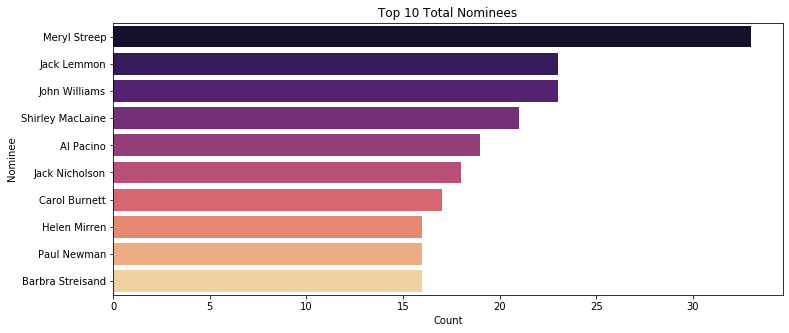

In [21]:
plt.figure(figsize=(12,5))
plt.title('Top 10 Total Nominees')
sns.barplot(y='name',x='nomination', data=Top_Nominee, palette = 'magma')
plt.xlabel('Count')
plt.ylabel('Nominee')

### 7. Visualisasi Nama Pemenang Terbanyak

In [22]:
TopWinners=data_win.nominee.value_counts().head(10).reset_index()
TopWinners.columns = ['name', 'nomination']

Text(0, 0.5, 'Nominee')

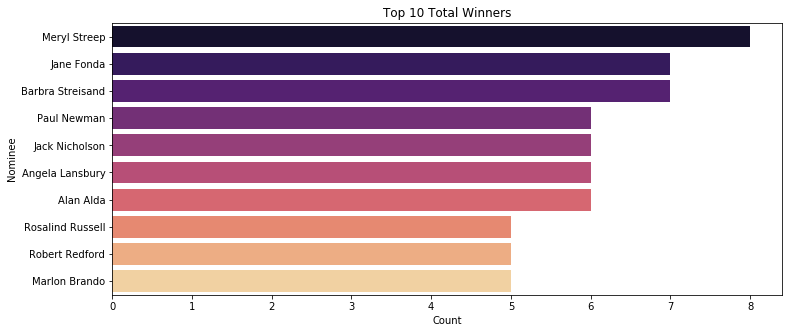

In [23]:
plt.figure(figsize=(12,5))
plt.title('Top 10 Total Winners')
sns.barplot(y='name',x='nomination', data=TopWinners, palette = 'magma')
plt.xlabel('Count')
plt.ylabel('Nominee')

### 8. Visualisasi Nominator Film Terbanyak

In [24]:
nominee_film=data_clean.loc[data_clean.film != 'non film']
nominee_film=nominee_film['film'].value_counts().head(10).reset_index()
nominee_film.columns =['film', 'nomination']

Text(0, 0.5, 'Film')

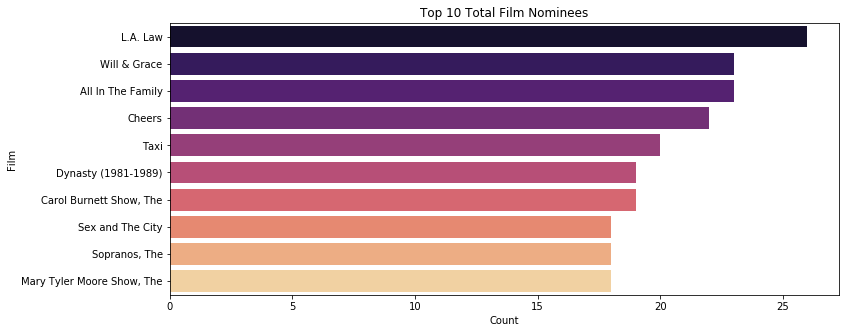

In [25]:
plt.figure(figsize=(12,5))
plt.title('Top 10 Total Film Nominees')
sns.barplot(y='film',x='nomination', data=nominee_film, palette = 'magma')
plt.xlabel('Count')
plt.ylabel('Film')

### 9. Visualisasi Pemenang Terbanyak Berdasarkan Film 

In [26]:
winner_film=data_win.loc[data_win.film != 'non film']
winner_film=winner_film['film'].value_counts().head(10).reset_index()
winner_film.columns =['film', 'nomination']

Text(0, 0.5, 'Film')

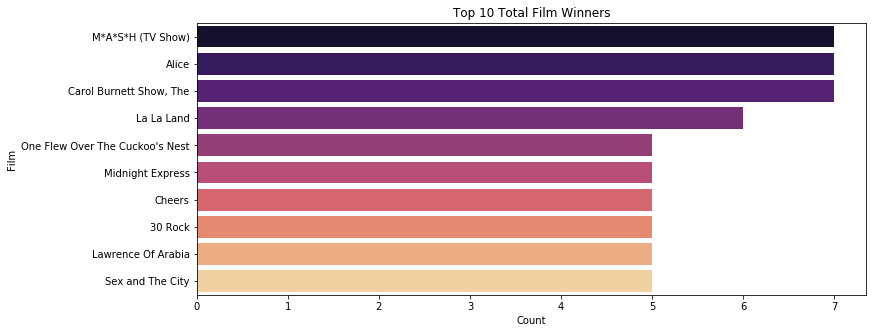

In [27]:
plt.figure(figsize=(12,5))
plt.title('Top 10 Total Film Winners')
sns.barplot(y='film',x='nomination', data=winner_film, palette = 'magma')
plt.xlabel('Count')
plt.ylabel('Film')

### 10. Persentase Kemenangan Teratas Tiap Nominasi (minimal 15 kali masuk nominasi)

In [28]:
total_nominee = data_clean.nominee.value_counts().reset_index()
total_winner = data_win.nominee.value_counts().reset_index()
wr = total_nominee.merge(total_winner, how = 'inner', on = 'index')
wr.columns = ['Name', 'Total_Nominees', 'Total_Winners']

In [29]:
wr = wr.sort_values(by='Total_Nominees', ascending=False)
wr['Win_Rate(%)'] = round((wr['Total_Winners'] / wr['Total_Nominees'])*100, 2)

In [30]:
Top_WR = wr[wr['Total_Nominees'] >= 15].sort_values(by='Win_Rate(%)', ascending=False).reset_index(drop=True).head(10)
Top_WR

,Name,Total_Nominees,Total_Winners,Win_Rate(%)
0,Jane Fonda,15,7,46.67
1,Barbra Streisand,16,7,43.75
2,Angela Lansbury,15,6,40.00
3,Paul Newman,16,6,37.50
4,Alan Alda,16,6,37.50
5,Jack Nicholson,18,6,33.33
6,Jessica Lange,16,5,31.25
7,Carol Burnett,17,5,29.41
8,Meryl Streep,33,8,24.24
9,Shirley MacLaine,21,5,23.81


### 11. Kesimpulan

- Sebanyak 7 kolom dan 7991 rows data yang digunakan
- Sebanyak 1800 null values terdapat pada kolom 'film', kemudian null values tersebut diinput dengan kategori 'non film'
- Tren jumlah nominasi secara garis besar terus bertambah dari tahun ke tahun, terjadi kestabilan mulai tahun 1980
- Kategori pada film yang paling banyak dinominasikan adalah 'Best Performance by an Actress in a Supporting Role in any Motion Picture'
- Kategori pada non film adalah 'Best Motion Picture - Drama'
- Meryl Streep merupakan orang yang paling banyak masuk nominasi pada penghargaan ini sebanyak 33 kali nominasi
- Meryl Streep juga merupakan orang yang paling banyak memenangkan penghargaan
- L.A. Law merupakan film yang paling banyak menyumbangkan nominator
- Alice, M*A*S*H (TV Show), dan Carol Burnett Show merupakan film yang paling banyak memenangkan nominatornya masing-masing sebanyak 7 kali
- Jane Fonda memiliki persentase kemenangan terbaik dengan 46.67% dengan 15 kali nominasi dan 7 kali kemenangan (min 15 kali nominasi)

# Terima Kasih